### ErsiliaAPI Demo II – Tuberculosis Drug Discovery Pipeline

TB: Tuberculosis

--> "the anti-tuberculosis (TB) drug remains too high"

--> Over 10 million cases per year

--> ~1.3 million deaths annually

--> Primarily affects people in South Asia, Sub-Saharan Africa, and parts of Eastern Europe

--> Current treatments are long and expensive: Standard TB treatment takes 6 months with a four-drug combination, can cost $400-$1000

**1. GDBMedChem similarity search: Finding Similar Compounds to TB Treatment Compound**

In [12]:
#"eos7jlv" = GDBMedChem similarity search

from ersilia.api import ErsiliaAPI
mdl_simil = ErsiliaAPI("eos7jlv")


In [13]:
mdl_simil.fetch()

⬇️  Fetching model eos7jlv: gdbmedchem-similarity
Getting model source
Model already exists on your system. If you want to fetch it again, please delete it first.
👎 Model eos7jlv failed to fetch! Model already exists on your system. If you want to fetch it again, please delete the existing model first.


In [14]:
mdl_simil.serve()

Serving model. This process may take some time...
🚀 Serving model eos7jlv: gdbmedchem-similarity

   URL: http://0.0.0.0:53595
   SRV: pulled_docker
   Session: /Users/ziminqian/eos/sessions/session_71855

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled


 Compounds of Current Treatments:

The expensive and time-consuming 4-month TB treatment regimen consists of:

-->Isoniazid (H): "C1=CN=CC=C1C(=O)NN"

--> Rifapentine (P): "C[C@H]1/C=C/C=C(\C(=O)NC2=C(C(=C3C(=C2O)C(=C(C4=C3C(=O)[C@](O4)(O/C=C/[C@@H]([C@H]([C@H]([C@@H]([C@@H]([C@@H]([C@H]1O)C)O)C)OC(=O)C)C)OC)C)C)O)O)/C=N/N5CCN(CC5)C6CCCC6)/C"

--> Pyrazinamide (Z): "C1=CN=C(C=N1)C(=O)N]"

--> Moxifloxacin (M):"COC1=C2C(=CC(=C1N3C[C@@H]4CCCN[C@@H]4C3)F)C(=O)C(=CN2C5CC5)C(=O)O"

In [15]:
input = ["C1=CN=CC=C1C(=O)NN", "C[C@H]1/C=C/C=C(\C(=O)NC2=C(C(=C3C(=C2O)C(=C(C4=C3C(=O)[C@](O4)(O/C=C/[C@@H]([C@H]([C@H]([C@@H]([C@@H]([C@@H]([C@H]1O)C)O)C)OC(=O)C)C)OC)C)C)O)O)/C=N/N5CCN(CC5)C6CCCC6)/C", "C1=CN=C(C=N1)C(=O)N]", "COC1=C2C(=CC(=C1N3C[C@@H]4CCCN[C@@H]4C3)F)C(=O)C(=CN2C5CC5)C(=O)O"]
mdl_simil.run(input, output="TB_Similarity_Results.csv", batch_size=5)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
/var/folders/0s/6kx9pjxn1ln7w02n_bnkwxs80000gn/T/ipykernel_71868/535396911.py:1: SyntaxWarning: invalid escape sequence '\C'
  input = ["C1=CN=CC=C1C(=O)NN", "C[C@H]1/C=C/C=C(\C(=O)NC2=C(C(=C3C(=C2O)C(=C(C4=C3C(=O)[C@](O4)(O/C=C/[C@@H]([C@H]([C@H]([C@@H]([C@@H]([C@@H]([C@H]1O)C)O)C)OC(=O)C)C)OC)C)C)O)O)/C=N/N5CCN(CC5)C6CCCC6)/C", "C1=CN=C(C=N1)C(=O)N]", "COC1=C2C(=CC(=C1N3C[C@@H]4CCCN[C@@H]4C3)F)C(=O)C(=CN2C5CC5)C(=O)O"]


Starting runner
Running batch 1
Batch 1 response fetched within: 11.1703 seconds
Output is being generated within: 11.42674 seconds
✅ The output successfully generated in TB_Similarity_Results.csv file!


Output: finding compounds similar to current tuberculosis treatment compounds

In [ ]:
mdl_simil.example("TB_Simil_example", True, True, 5, False)

Output: /Users/ziminqian/Desktop/ersilia/TB_Similarity_Results.csv

In [ ]:
mdl_simil.close()
mdl_simil.delete()

 **2. CARDIOTOXICITY CLASSIFIER**

Using only the outputs of the similarity model, we can determine the cardiotoxicity of these three outputs that are similar to the treatment compounds. Note: no similar compounds were found for Pyrazinamide (Z): "C1=CN=C(C=N1)C(=O)N]".

In [16]:
#"eos1pu1" cardiotoxicity classifier
from ersilia.api import ErsiliaAPI

mdl_toxicity = ErsiliaAPI("eos1pu1")
mdl_toxicity.fetch()
mdl_toxicity.serve()
input = [
    "CNC(C#CCO)(C(=O)C#N)c1ccco1",
    "CC(=O)C1(C)C=C(C)C(O)C1=O",
    "O=C1CCC(CC1)C1CCC[NH2+]1"]

mdl_toxicity.run(input, output="TB_Cardiotoxicity_Results.csv", batch_size=100)
mdl_toxicity.close()
mdl_toxicity.delete()

⬇️  Fetching model eos1pu1: cardiotox-dictrank
Getting model source
Model doesn't exist on your system, fetching it now.
Initiating fetch from DockerHub — this process may take some time...
Writing model source to file
👍 Model eos1pu1 fetched successfully!
Serving model. This process may take some time...
🚀 Serving model eos1pu1: cardiotox-dictrank

   URL: http://0.0.0.0:54357
   SRV: pulled_docker
   Session: /Users/ziminqian/eos/sessions/session_71855

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
Starting runner
Running batch 1
Batch 1 response fetched within: 0.9329 seconds
Output is being generated within: 0.97129 seconds
✅ The output successfully generated in TB_Cardiotoxicity_Results.csv file!
⛔ Model eos1pu1 closed
Deleting model eos1pu1
💥 Model eos1pu1 deleted successfully!


Cardiotoxicity Plot:

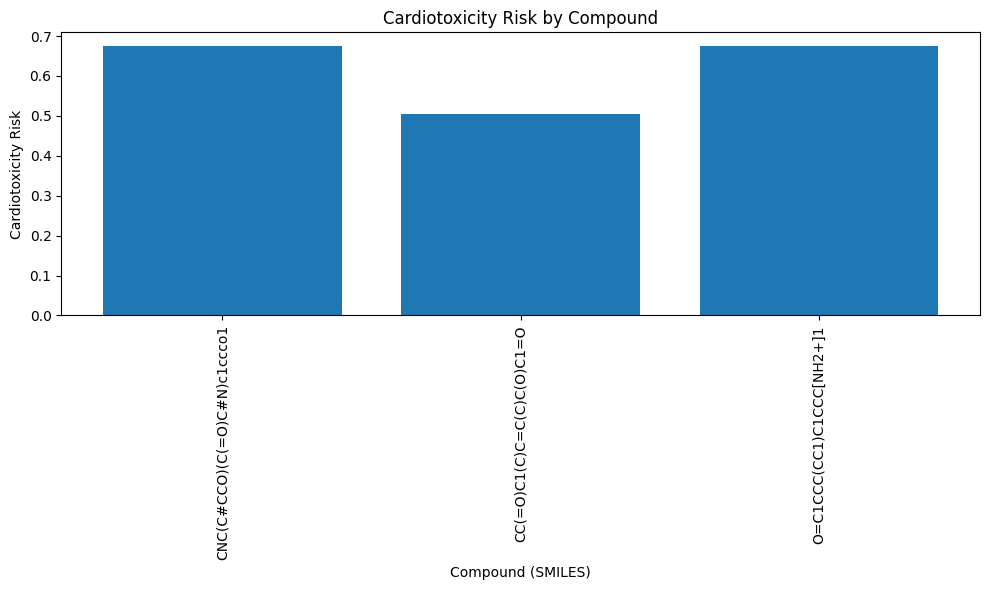

In [17]:
#Cardiotoxicity visual for these compounds
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('/Users/ziminqian/Desktop/ersilia/TB_Cardiotoxicity_Results.csv')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df['input'], df['cardiotoxicity_risk'])

plt.xlabel('Compound (SMILES)')
plt.ylabel('Cardiotoxicity Risk')
plt.title('Cardiotoxicity Risk by Compound')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

OUTPUT: /Users/ziminqian/Desktop/ersilia/TB_Cardiotoxicity_Results.csv

**3. PHARMACOKINETICS PROFILER(PhaKinPro)**

In [18]:
from ersilia.api import ErsiliaAPI
#"eos39dp" Pharmacokinetics Profiler (PhaKinPro)
mdl_pharmacokinetics = ErsiliaAPI("eos39dp")
mdl_pharmacokinetics.fetch()
mdl_pharmacokinetics.serve()
#using the same three outputs from similarity model...
input = [
    "CNC(C#CCO)(C(=O)C#N)c1ccco1",
    "CC(=O)C1(C)C=C(C)C(O)C1=O",
    "O=C1CCC(CC1)C1CCC[NH2+]1"]

mdl_pharmacokinetics.run(input, output="TB_Pharmacokinetics_Results.csv", batch_size=100)
mdl_pharmacokinetics.close()
mdl_pharmacokinetics.delete()

⬇️  Fetching model eos39dp: phakinpro
Getting model source
Model doesn't exist on your system, fetching it now.
Initiating fetch from DockerHub — this process may take some time...
Writing model source to file
👍 Model eos39dp fetched successfully!
Serving model. This process may take some time...
🚀 Serving model eos39dp: phakinpro

   URL: http://0.0.0.0:54506
   SRV: pulled_docker
   Session: /Users/ziminqian/eos/sessions/session_71855

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
Starting runner
Running batch 1
Batch 1 response fetched within: 1.2974 seconds
Output is being generated within: 1.33089 seconds
✅ The output successfully generated in TB_Pharmacokinetics_Results.csv file!
⛔ Model eos39dp closed
Deleting model eos39dp
💥 Model eos39dp deleted successfully!


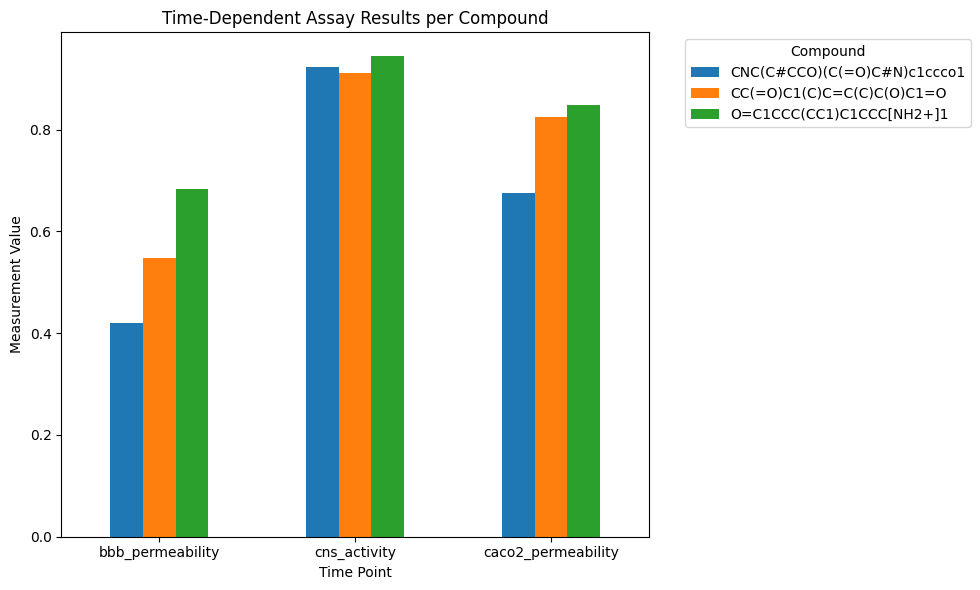

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your actual CSV
df = pd.read_csv("/Users/ziminqian/Desktop/ersilia/TB_Pharmacokinetics_Results.csv")

# Select columns of interest
time_cols = ['bbb_permeability', 'cns_activity', 'caco2_permeability']

# Plot
df_subset = df[['input'] + time_cols]

df_subset.set_index('input')[time_cols].T.plot(kind='bar', figsize=(10, 6))

plt.title("Time-Dependent Assay Results per Compound")
plt.xlabel("Time Point")
plt.ylabel("Measurement Value")
plt.xticks(rotation=0)
plt.legend(title="Compound", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### ErsiliaAPI Demo III: Carbon Capture Compounds

Calcium Hydroxide (Ca(OH)₂)
Forms solid calcium carbonate (CaCO₃), locking away CO₂ permanently.
Easy to source, low toxicity, works at ambient conditions.
Used in mineralization reactors, concrete curing, and CO₂ storage projects.


1. **GDBMedChem similarity search**
Find compounds that are similar: find alternative compounds for carbon capture

In [22]:
#"eos7jlv" = GDBMedChem similarity search

from ersilia.api import ErsiliaAPI
mdl_simil = ErsiliaAPI("eos7jlv")
mdl_simil.fetch()
mdl_simil.serve()
input = ["[OH-].[OH-].[Ca+2]"]
mdl_simil.run(input, output="Carbon_Capture_Similarity.csv", batch_size=100)
mdl_simil.close()
mdl_simil.delete()

⬇️  Fetching model eos7jlv: gdbmedchem-similarity
Getting model source
Model already exists on your system. If you want to fetch it again, please delete it first.
👎 Model eos7jlv failed to fetch! Model already exists on your system. If you want to fetch it again, please delete the existing model first.
Serving model. This process may take some time...
🚀 Serving model eos7jlv: gdbmedchem-similarity

   URL: http://0.0.0.0:54664
   SRV: pulled_docker
   Session: /Users/ziminqian/eos/sessions/session_71855

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
Starting runner
Running batch 1
Batch 1 response fetched within: 7.2825 seconds
Output is being generated within: 7.41211 seconds
✅ The output successfully generated in Carbon_Capture_Similarity.csv file!


**Retrosynthetic Accessibility**

In [26]:
from ersilia.api import ErsiliaAPI

mdl_retro = ErsiliaAPI("eos2r5a")
mdl_retro.fetch()
mdl_retro.serve()
input = ["[OH-].[OH-].[Ca+2]"]
mdl_retro.run(input, output="Carbon_Capture_Retro.csv", batch_size=100)

⬇️  Fetching model eos2r5a: retrosynthetic-accessibility
Getting model source
Model already exists on your system. If you want to fetch it again, please delete it first.
👎 Model eos2r5a failed to fetch! Model already exists on your system. If you want to fetch it again, please delete the existing model first.
Serving model. This process may take some time...
🚀 Serving model eos2r5a: retrosynthetic-accessibility

   URL: http://0.0.0.0:55624
   SRV: pulled_docker
   Session: /Users/ziminqian/eos/sessions/session_71855

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
Starting runner
Running batch 1
Batch 1 response fetched within: 1.9322 seconds
Output is being generated within: 2.21520 seconds
✅ The output successfully generated in Carbon_Capture_Retro.csv file!


Predict micro-pKa of organic molecules

Using only three of the similar compounds, we can predict the micro-pKA of these molecules to see if they are fit for carbon capture. **No output since these may not be organic molecules

In [23]:
from ersilia.api import ErsiliaAPI

mdl_pka = ErsiliaAPI("eos3wzy")
mdl_pka.fetch()
mdl_pka.serve()
input = ["C(C1=CCOC1)c1ccco1", "C(C1=CCOC1)c1ccco1", "C(C1CC(C1)C1CCC1)c1ccco1"]
mdl_pka.run(input, output="Micro_pka.csv", batch_size=100)
mdl_pka.close()
mdl_pka.delete()

⬇️  Fetching model eos3wzy: qupkake
Getting model source
Model already exists on your system. If you want to fetch it again, please delete it first.
👎 Model eos3wzy failed to fetch! Model already exists on your system. If you want to fetch it again, please delete the existing model first.
Serving model. This process may take some time...
🚀 Serving model eos3wzy: qupkake

   URL: http://0.0.0.0:54767
   SRV: pulled_docker
   Session: /Users/ziminqian/eos/sessions/session_71855

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
Starting runner
Running batch 1
Batch 1 response fetched within: 1.0185 seconds
✅ The output successfully generated in Micro_pka.csv file!


**Toxicity**

How toxic are these compounds? if we released them into the air for carbon capture, would it be toxic to people?

In [25]:
from ersilia.api import ErsiliaAPI

mdl_toxicity = ErsiliaAPI("eos1pu1")
mdl_toxicity.fetch()
mdl_toxicity.serve()
input = ["C(C1=CCOC1)c1ccco1", "C(C1=CCOC1)c1ccco1", "C(C1CC(C1)C1CCC1)c1ccco1"]
mdl_toxicity.run(input, output="CarbonCapture_Cardiotoxicity_Results.csv", batch_size=100)
mdl_toxicity.close()
mdl_toxicity.delete()

⬇️  Fetching model eos1pu1: cardiotox-dictrank
Getting model source
Model doesn't exist on your system, fetching it now.
Initiating fetch from DockerHub — this process may take some time...
Writing model source to file
👍 Model eos1pu1 fetched successfully!
Serving model. This process may take some time...
🚀 Serving model eos1pu1: cardiotox-dictrank

   URL: http://0.0.0.0:55485
   SRV: pulled_docker
   Session: /Users/ziminqian/eos/sessions/session_71855

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
Starting runner
Running batch 1
Batch 1 response fetched within: 0.8814 seconds
Output is being generated within: 0.92488 seconds
✅ The output successfully generated in CarbonCapture_Cardiotoxicity_Results.csv file!


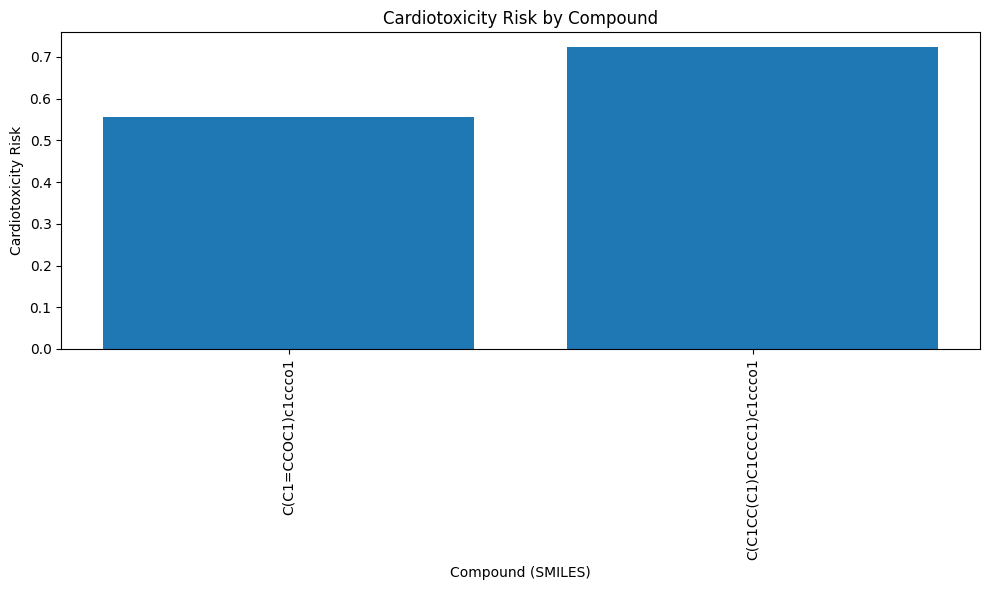

In [29]:
#Cardiotoxicity visual for these compounds
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('CarbonCapture_Cardiotoxicity_Results.csv')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(df['input'], df['cardiotoxicity_risk'])

plt.xlabel('Compound (SMILES)')
plt.ylabel('Cardiotoxicity Risk')
plt.title('Cardiotoxicity Risk by Compound')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### ErsiliaAPI Demo IV: Cardiotoxicity of Alcohol

Ethanol: CCO

THC: CCCCCC1=CC(=C2[C@@H]3C=C(CC[C@H]3C(OC2=C1)(C)C)C)O


Psilocybin: CN(C)CCC1=CNC2=C1C(=CC=C2)OP(=O)(O)O

In [1]:
from ersilia.api import ErsiliaAPI

mdl_toxicity = ErsiliaAPI("eos1pu1")
mdl_toxicity.fetch()
mdl_toxicity.serve()
input = ["CCO", "CCCCCC1=CC(=C2[C@@H]3C=C(CC[C@H]3C(OC2=C1)(C)C)C)O", "CN(C)CCC1=CNC2=C1C(=CC=C2)OP(=O)(O)O"]
mdl_toxicity.run(input, output="Drug_Cardiotoxicity_Results.csv", batch_size=100)

⬇️  Fetching model eos1pu1: cardiotox-dictrank
Getting model source
Model already exists on your system. If you want to fetch it again, please delete it first.
👎 Model eos1pu1 failed to fetch! Model already exists on your system. If you want to fetch it again, please delete the existing model first.
Serving model. This process may take some time...
🚀 Serving model eos1pu1: cardiotox-dictrank

   URL: http://0.0.0.0:52966
   SRV: pulled_docker
   Session: /Users/ziminqian/eos/sessions/session_71855

🔄 Cache fetching mode:
   - Disabled

💾 Local cache:
   - Enabled

📈 Tracking:
   - Disabled
Starting runner
Running batch 1
Batch 1 response fetched within: 0.0078 seconds
Output is being generated within: 0.08560 seconds
✅ The output successfully generated in Drug_Cardiotoxicity_Results.csv file!


Output: /Users/ziminqian/Desktop/ersilia/Drug_Cardiotoxicity_Results.csv

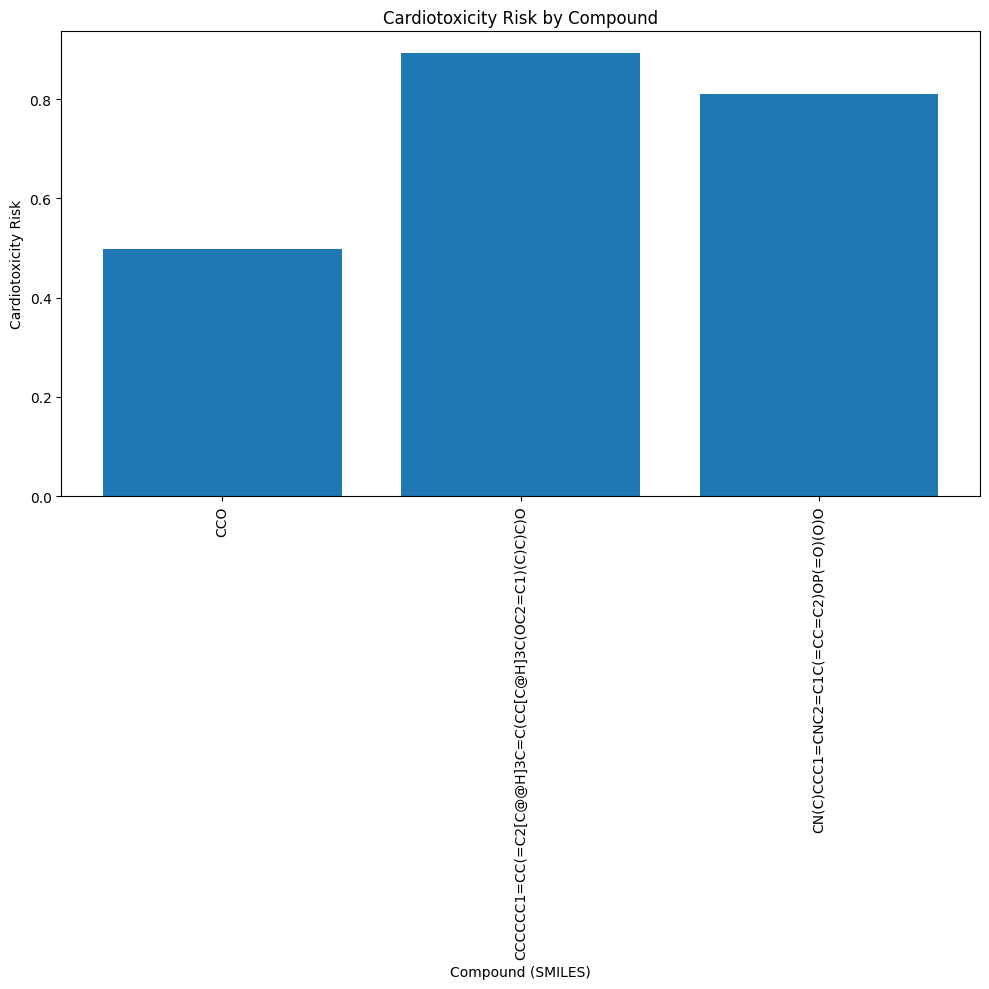

In [31]:
#Cardiotoxicity visual for these compounds
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('Drug_Cardiotoxicity_Results.csv')

# Plot
plt.figure(figsize=(10, 10))
plt.bar(df['input'], df['cardiotoxicity_risk'])

plt.xlabel('Compound (SMILES)')
plt.ylabel('Cardiotoxicity Risk')
plt.title('Cardiotoxicity Risk by Compound')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
key,input,cardiotoxicity_risk
"47029b0a89b677c61d67c3a1b1071f07","CCO",0.4987850927523634
"309faa120a4e3f1f7fe822e5f9556545","CCCCCC1=CC(=C2[C@@H]3C=C(CC[C@H]3C(OC2=C1)(C)C)C)O",0.8919920695276052
"6a72d75cda57b75f152b856ad3922937","CN(C)CCC1=CNC2=C1C(=CC=C2)OP(=O)(O)O",0.8097184533513834